In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers = ['MSFT', 'AAPL', 'GOOG']
df0 = yf.download(tickers[0], start='2025-01-01', end=None)
df1 = yf.download(tickers[1], start='2020-01-01', end=None)
df2 = yf.download(tickers[2], start='2020-01-01', end=None)

C:\Users\arthu\AppData\Local\Temp\ipykernel_20520\3186780095.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df0 = yf.download(tickers[0], start='2025-01-01', end=None)
[*********************100%***********************]  1 of 1 completed
C:\Users\arthu\AppData\Local\Temp\ipykernel_20520\3186780095.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download(tickers[1], start='2020-01-01', end=None)
[*********************100%***********************]  1 of 1 completed
C:\Users\arthu\AppData\Local\Temp\ipykernel_20520\3186780095.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download(tickers[2], start='2020-01-01', end=None)
[*********************100%***********************]  1 of 1 completed


In [3]:
#Microsoft
df0['returns'] = df0['Close'].pct_change().dropna()
df0['MA20'] = df0['Close'].rolling(window=20).mean()
df0['MA50'] = df0['Close'].rolling(window=50).mean()
df0['VOL30'] = df0['returns'].rolling(window=30).std()

#Apple
df1['returns'] = df1['Close'].pct_change().dropna()
df1['MA20'] = df1['Close'].rolling(window=20).mean()
df1['MA50'] = df1['Close'].rolling(window=50).mean()
df1['VOL30'] = df1['returns'].rolling(window=30).std()

#Google
df2['returns'] = df2['Close'].pct_change().dropna()
df2['MA20'] = df2['Close'].rolling(window=20).mean()
df2['MA50'] = df2['Close'].rolling(window=50).mean()
df2['VOL30'] = df2['returns'].rolling(window=30).std()

In [4]:
#Signals
signal0 = (df0['MA20'] > df0['MA50'])
signal1 = (df1['MA20'] > df1['MA50'])
signal2 = (df2['MA20'] > df2['MA50'])

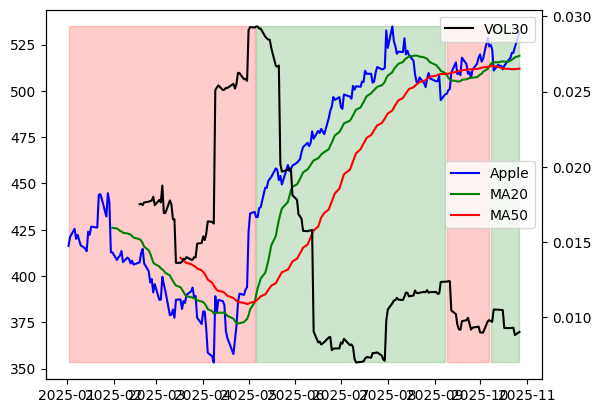

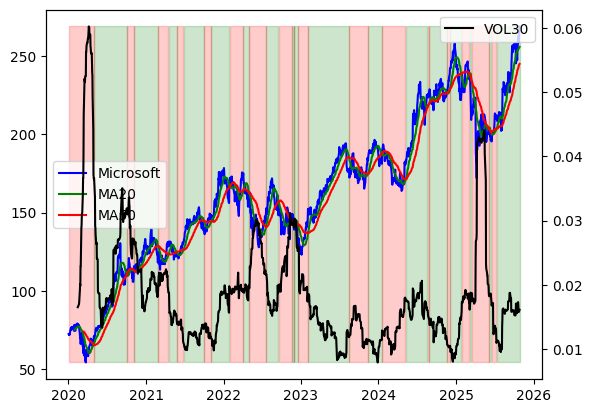

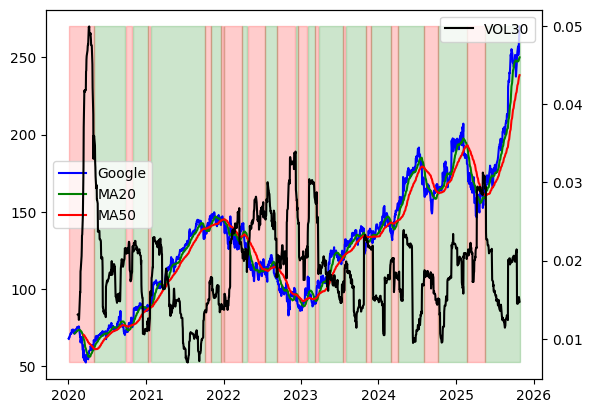

In [5]:
#Visualisation of Microsoft
plt.plot(df0.index, df0['Close'],color='blue', label='Apple')
plt.plot(df0.index, df0['MA20'],color='green', label='MA20')
plt.plot(df0.index, df0['MA50'],color='red', label='MA50')
plt.fill_between(df0.index, df0['Close'].min(), df0['Close'].max(), where=signal0, color='green', alpha = 0.2)
plt.fill_between(df0.index, df0['Close'].min(), df0['Close'].max(), where=~signal0, color='red', alpha = 0.2)
plt.legend()
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(df0.index, df0['VOL30'], color='black', label='VOL30')
plt.legend()
plt.show()

#Visualisation of Apple
plt.plot(df1.index, df1['Close'],color='blue', label='Microsoft')
plt.plot(df1.index, df1['MA20'],color='green', label='MA20')
plt.plot(df1.index, df1['MA50'],color='red', label='MA50')
plt.fill_between(df1.index, df1['Close'].min(), df1['Close'].max(), where=signal1, color='green', alpha = 0.2)
plt.fill_between(df1.index, df1['Close'].min(), df1['Close'].max(), where=~signal1, color='red', alpha = 0.2)
plt.legend()
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(df1.index, df1['VOL30'], color='black', label='VOL30')
plt.legend()
plt.show()

#Visualisation of Google
plt.plot(df2.index, df2['Close'],color='blue', label='Google')
plt.plot(df2.index, df2['MA20'],color='green', label='MA20')
plt.plot(df2.index, df2['MA50'],color='red', label='MA50')
plt.fill_between(df2.index, df2['Close'].min(), df2['Close'].max(), where=signal2, color='green', alpha = 0.2)
plt.fill_between(df2.index, df2['Close'].min(), df2['Close'].max(), where=~signal2, color='red', alpha = 0.2)
plt.legend()
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(df2.index, df2['VOL30'], color='black', label='VOL30')
plt.legend()
plt.show()